## 7.5 Diferenças Finitas: Equações Elípticas

Equações elípticas são usadas tipicamente para caracterizar problemas de contorno estacionário. Para introduzir o assunto, vamos analisar um caso simples, a equação de Laplace, deduzido a partir de um contexto físico. 

### A Equação de Laplace

A equação de Laplace pode ser usada para modelar diversos problemas envolvendo o potencial de uma variável desconhecida. Por simplicidade, vamos usar uma placa aquecida como contexto básico para a dedução e resolução dessa EDP elíptica.

A figura a seguir mostra um elemento na face de uma placa retangular fina de espessura $\Delta z$. A placa é isolada em toda parte, exceto nas bordas, em que a temperatura é constante. Assim, a transferência de calor é limitada às direções $x$ e $y$. 



No estado estacionário, o fluxo de calor para dentro do elemento em um período unitário $\Delta t$ deve ser igual ao fluxo para fora, como em


Desejamos agora resolver numericamente um problema de condução de calor, usando a equação de Laplace

$$ \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial x^2} = 0$$

A eq. de Laplace é uma EDP elíptica usada para modelar diversos problemas de engenharia envolvendo o potencial de uma variável desconhecida.

Em razão de sua simplicidade e aplicabilidade, será utilizado como contexto fundamental para o desenvolvimento desse trabalho, uma placa aquecida.

Para a solução numérica por diferenças finitas, trata-se a placa como uma grade de pontos onde as derivadas parciais da equação de Laplace são substituidas por aproximações.

As aproximações usadas são dadas pelas fórmulas de diferença dividida centrada, baseadas na expanção em série de Taylor (Chapra, p.578). Assim, a EDP é transformada em uma equação de diferença algébrica , como descrito a seguir.

$$ \frac{\partial^2 T}{\partial x^2} = \frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$$
e
$$ \frac{\partial^2 T}{\partial x^2} = \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}$$

Substituindo essas expressõesn na equação de Laplace, obtem-se

$$\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2} + \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2} = 0 $$

Para uma grade quadrada, ou seja, em que $\Delta x = \Delta y$, a equação pode ser reescrita como 

$$ T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}- 4T_{i,j}=0$$

ou 

$$ T_{i,j}=\cfrac{T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}}{4} $$

a qual é válida para todos pontos no interior da placa. Essa relação é conhecida como *equação de diferenças de Laplace*.


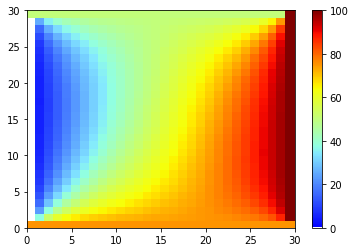

In [15]:
from matplotlib.pyplot import *
import matplotlib
import numpy as np


T = np.zeros([30,30])
T[-1, :] = 50
T[:, -1] = 100
T[0,  :] = 75 

lamb = 1.5

#print(T)
for n in range(190):
    #print ("iteração:", n+1)
    for i in range(1,len(T)-1):
        for j in range(1,len(T)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            #print ("T[",i,",",j,"]=", T[i,j])
        
# tabela de cores para o plot
dic = {'red': ((0., 1, 1), (0, 0, 0), (0.66, 1, 1), (0.89,1, 1), (1, 0.5, 0.5)), 
       'green': ((0., 1, 1), (0, 0, 0), (0.375,1, 1), (0.64,1, 1), (0.91,0,0), (1, 0, 0)), 
       'blue': ((0., 1, 1), (0., 1, 1), (0.34, 1, 1), (0.65,0, 0), (1, 0, 0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',dic,256)

# plot
pcolor(T,cmap=my_cmap)
colorbar()
show()

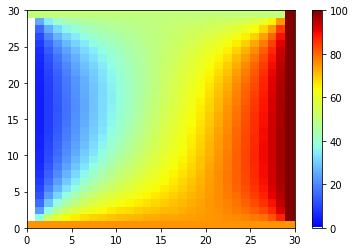

In [10]:
from matplotlib.pyplot import *
import matplotlib
import numpy as np


T = np.zeros([30,30])
T[-1, :] = 50
T[:, -1] = 100
T[0,  :] = 75 

lamb = 1.5

#print(T)
for n in range(100):
    #print ("iteração:", n+1)
    for i in range(1,len(T)-1):
        for j in range(1,len(T)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            #print ("T[",i,",",j,"]=", T[i,j])
        
# tabela de cores para o plot
dic = {'red': ((0., 1, 1), (0.00000000001, 0, 0), (0.66, 1, 1), (0.89,1, 1), (1, 0.5, 0.5)), 
       'green': ((0., 1, 1), (0.00000000001, 0, 0), (0.375,1, 1), (0.64,1, 1), (0.91,0,0), (1, 0, 0)), 
       'blue': ((0., 1, 1), (0.00000000001, 1, 1), (0.34, 1, 1), (0.65,0, 0), (1, 0, 0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',dic,256)

# plot
pcolor(T,cmap=my_cmap)
colorbar()
show()

$f(x+h)≈f(x)+ {f} ^ {'} (x)h+ {{f} ^ {″} left (x right ) {h} ^ {2}} over {2} + {{f} ^ {‴} left (x right ) {h} ^ {3}} over {6} +o( {h} ^ {4} )$